In [1]:
%run bk_RW_catalogue.ipynb

import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Scaler definition

RowStandardScaler applies standard scaling along the rows.

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler


class RowStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        scaler = StandardScaler()
        return scaler.fit_transform(X.transpose()).transpose()


class RowRobustScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        scaler = RobustScaler()
        return scaler.fit_transform(X.transpose()).transpose()



## Data Reading

In [4]:
file = 'data/datasets/df_raw.csv'
df_raw = pd.read_csv(file)

df_raw = df_raw[df_raw.fillNumber != 2011]

df_raw = df_raw.astype({'fillNumber': 'int'})
df_raw = df_raw.set_index(['gauge_id','fillNumber'], drop=True)
df_raw.index.get_level_values('fillNumber').value_counts()

5979    808
5980    806
2010    676
2025    673
2009    673
2022    672
2216    672
2040    670
Name: fillNumber, dtype: int64

In [5]:
df_raw.head()

,,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
gauge_id,fillNumber,,,,,,,,,,,,,,,,,,,,,
VGPB.1.5L4.R.PR,5979,2.000000e-11,1.900000e-11,1.900000e-11,1.900000e-11,1.935549e-11,1.976073e-11,1.968473e-11,1.900000e-11,1.900000e-11,1.900000e-11,...,1.968505e-11,1.959925e-11,1.951345e-11,1.942765e-11,1.934184e-11,1.925604e-11,1.917024e-11,1.908443e-11,1.901901e-11,1.900000e-11
VGPB.1024.4R6.B.PR,5979,1.300000e-10,1.200000e-10,1.200000e-10,1.200000e-10,1.264112e-10,1.220118e-10,1.288277e-10,1.200000e-10,1.200000e-10,1.200000e-10,...,9.969742e-11,9.952454e-11,9.935166e-11,9.917878e-11,9.900590e-11,9.919450e-11,9.939588e-11,9.959725e-11,9.979863e-11,1.000000e-10
VGPB.1026.4L6.R.PR,5979,3.200000e-11,3.221755e-11,3.243509e-11,3.265264e-11,3.287019e-11,3.297137e-11,3.290039e-11,3.282941e-11,3.275843e-11,3.268745e-11,...,3.300000e-11,3.300000e-11,3.300000e-11,3.290791e-11,3.259083e-11,3.227375e-11,3.200000e-11,3.200000e-11,3.200000e-11,3.200000e-11
VGPB.1032.4L6.R.PR,5979,1.700000e-11,1.849856e-11,1.912570e-11,2.005436e-11,2.057650e-11,2.100000e-11,2.100000e-11,2.100000e-11,2.112102e-11,2.145884e-11,...,2.179222e-11,2.182885e-11,2.186547e-11,2.190210e-11,2.193873e-11,2.197535e-11,2.200000e-11,2.200000e-11,2.200000e-11,2.200000e-11
VGPB.1032.4R6.B.PR,5979,2.700000e-10,2.701868e-10,2.703736e-10,2.705604e-10,2.707472e-10,2.709339e-10,2.711207e-10,2.713075e-10,2.714943e-10,2.716811e-10,...,1.877756e-10,1.891516e-10,1.868050e-10,1.863890e-10,1.884675e-10,1.837786e-10,1.900000e-10,1.900000e-10,1.900000e-10,1.900000e-10


## Finding the best k with row normalization

In [6]:
from sklearn.cluster import KMeans


scaler = RowStandardScaler()
X_scaled = scaler.fit_transform(df_raw)


In [7]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(X_scaled)
                for k in range(5, 20, 5)]
inertias = [model.inertia_ for model in kmeans_per_k]

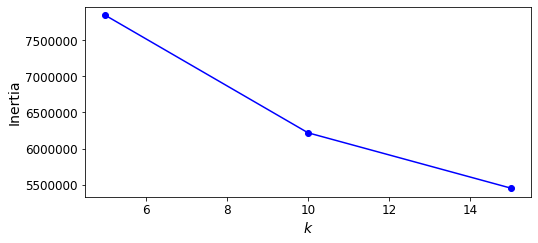

In [8]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(5, 20, 5), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [9]:
kmeans_10 = kmeans_per_k[2]

In [10]:
X_kmeans = kmeans_10.transform(X_scaled)
idx_representative = np.argmin(X_kmeans, axis=0)

3819


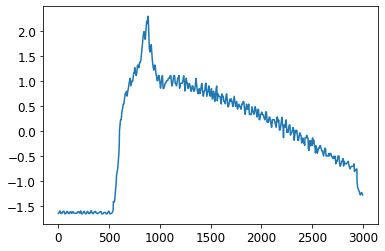

1213


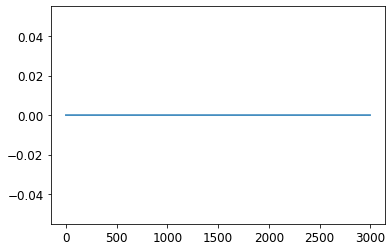

1957


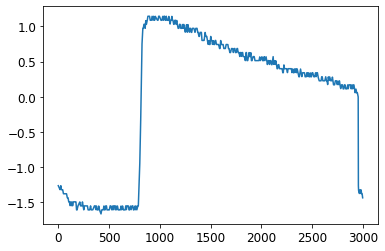

4974


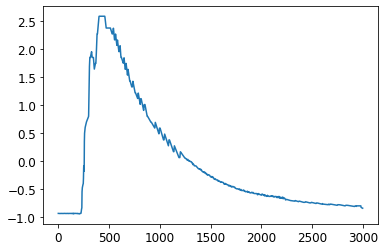

5199


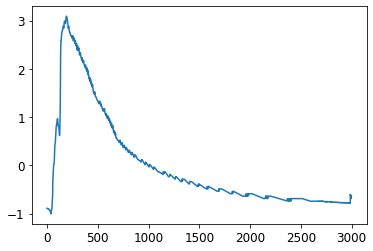

1801


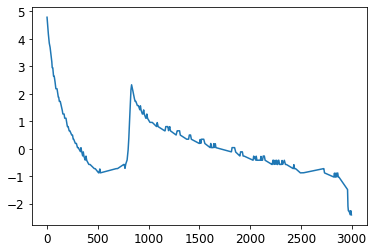

4178


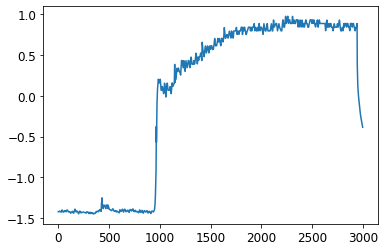

3180


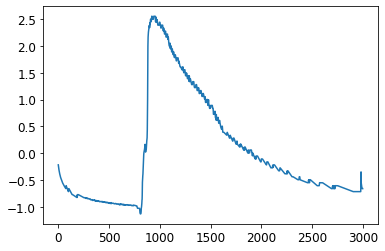

5285


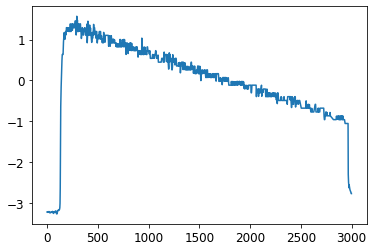

2790


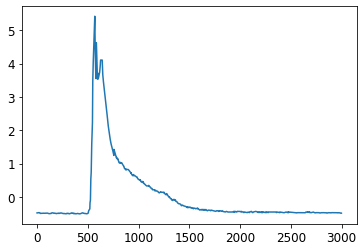

4429


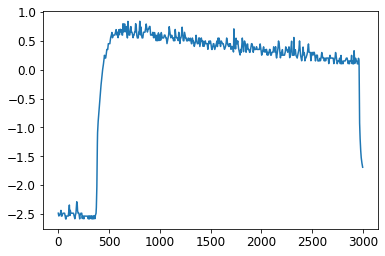

854


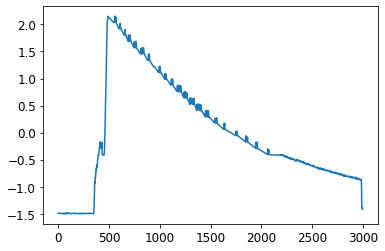

662


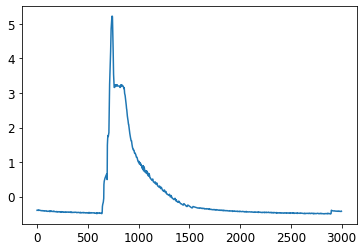

3455


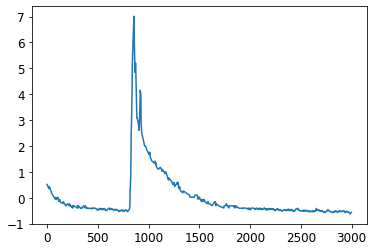

5202


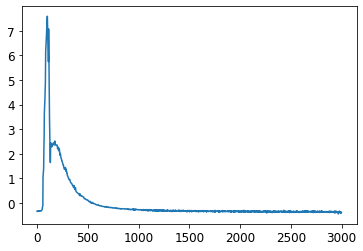

In [11]:
for i in idx_representative:
    print(i)
    plt.figure()
    plt.plot(X_scaled[i])
    plt.show()

In [19]:
y = kmeans_10.predict(X_scaled)
y[3819]

0

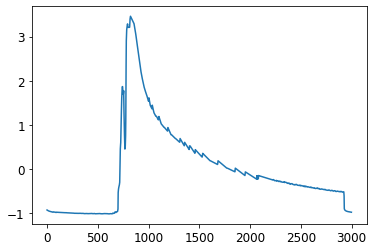

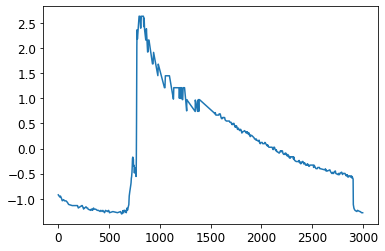

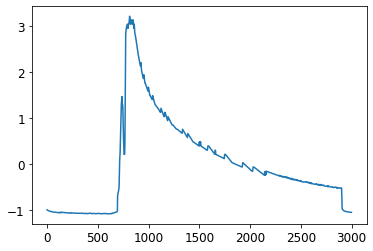

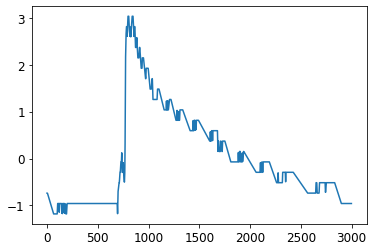

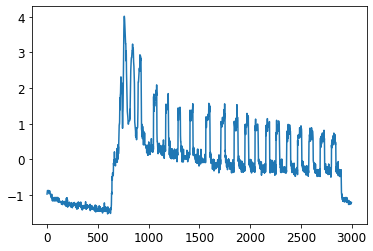

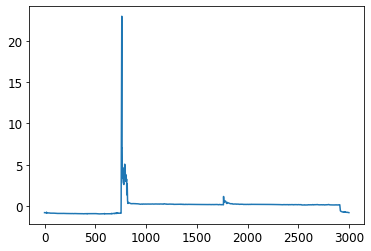

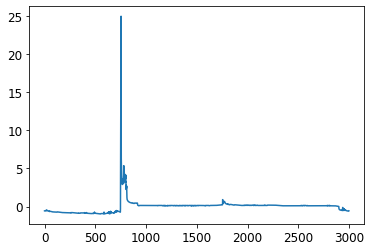

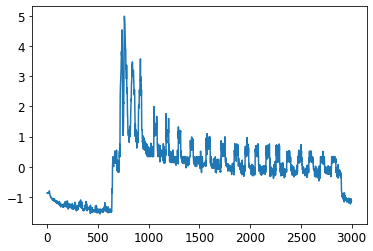

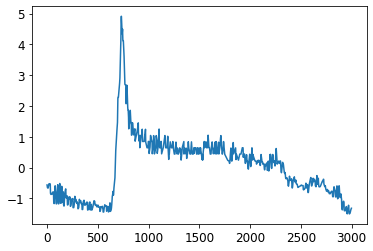

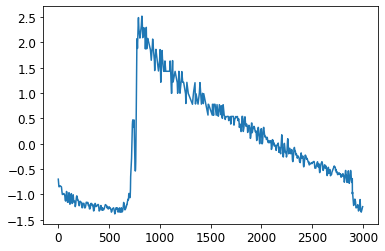

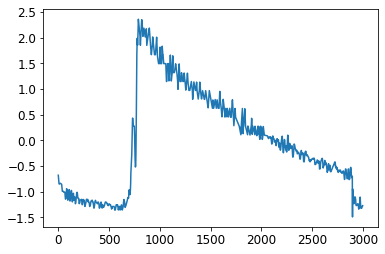

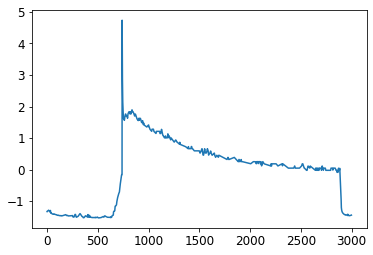

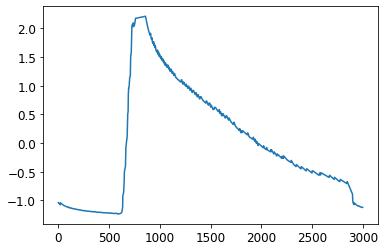

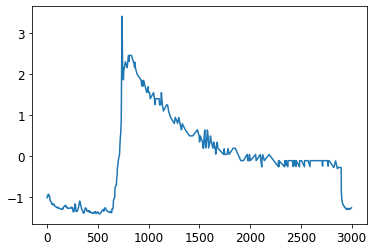

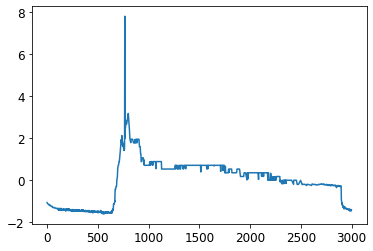

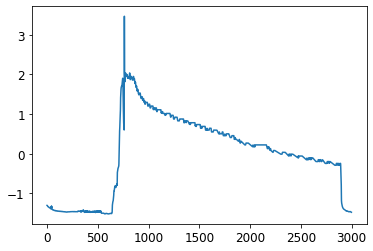

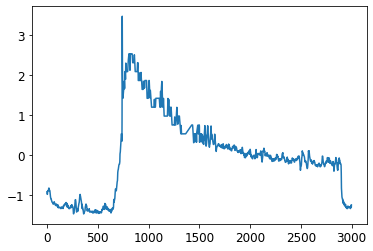

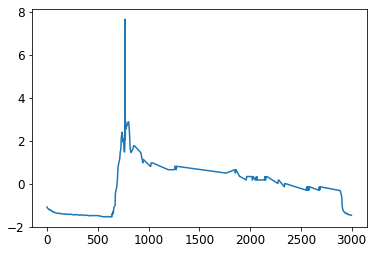

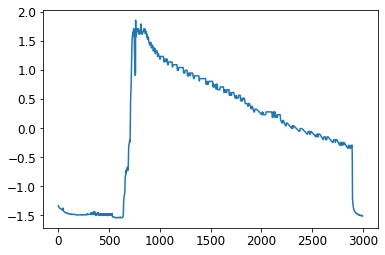

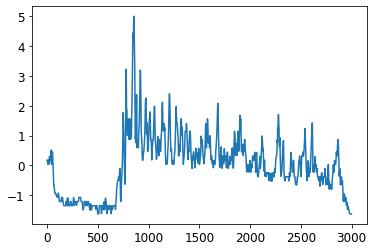

In [20]:
for i in np.where(y==0)[0][:20]:
    plt.plot(range(3000), X_scaled[i])
    plt.show()

In [39]:
cluster_index = np.where(y==11)[0]
df_clustered = df_raw.iloc[indexes]

In [40]:
df_clustered.to_csv('df_clusterd.csv')


In [41]:
df_clustered = pd.read_csv('df_clusterd.csv')
df_clustered.head()

,gauge_id,fillNumber,0,1,2,3,4,5,6,7,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,VGPB.1024.4R6.B.PR,5980,1.100000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000444e-10,...,1.278088e-10,1.287054e-10,1.296019e-10,1.200000e-10,1.200000e-10,1.200000e-10,1.200000e-10,1.200000e-10,1.200000e-10,1.200000e-10
1,VGPB.1032.4R6.B.PR,5980,2.000000e-10,1.969913e-10,1.903892e-10,1.960840e-10,1.910615e-10,1.968225e-10,1.976434e-10,1.953504e-10,...,2.764143e-10,2.780895e-10,2.797647e-10,2.787469e-10,2.772891e-10,2.758313e-10,2.743735e-10,2.729156e-10,2.714578e-10,2.700000e-10
2,VGPB.196.5R5.R.PR,2216,3.900000e-10,3.872323e-10,3.844646e-10,3.816969e-10,3.790116e-10,3.764568e-10,3.739020e-10,3.713472e-10,...,2.064054e-10,2.056937e-10,2.049820e-10,2.042703e-10,2.035586e-10,2.028468e-10,2.021351e-10,2.014234e-10,2.007117e-10,2.000000e-10
3,VGPB.198.5R5.R.PR,2216,4.800000e-10,4.767336e-10,4.734672e-10,4.702008e-10,4.700000e-10,4.700000e-10,4.700000e-10,4.700000e-10,...,2.518902e-10,2.548642e-10,2.578383e-10,2.591222e-10,2.559083e-10,2.526944e-10,2.505113e-10,2.536742e-10,2.568371e-10,2.600000e-10
4,VGPB.2.7L5.R.PR,2216,5.400000e-10,5.366777e-10,5.333555e-10,5.300332e-10,5.275020e-10,5.249787e-10,5.224555e-10,5.202509e-10,...,3.080636e-10,3.049968e-10,3.019299e-10,3.000000e-10,3.000000e-10,3.000000e-10,3.000000e-10,3.000000e-10,3.000000e-10,3.000000e-10


1089


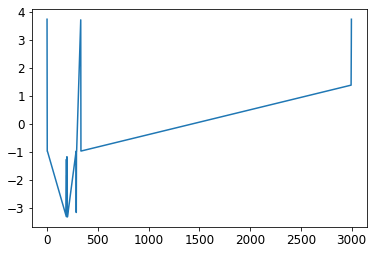

1108


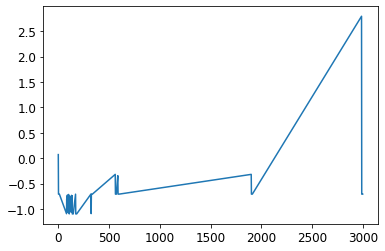

1119


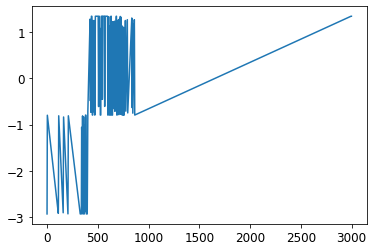

1189


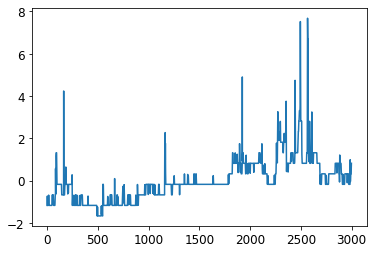

1198


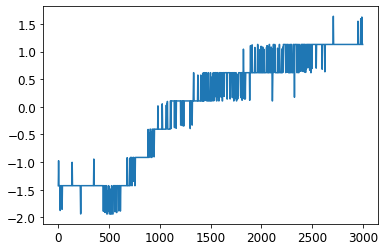

1209


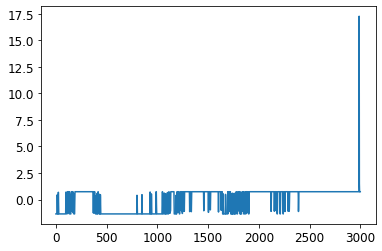

1214


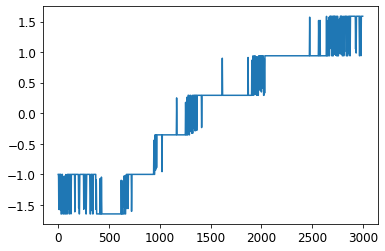

1219


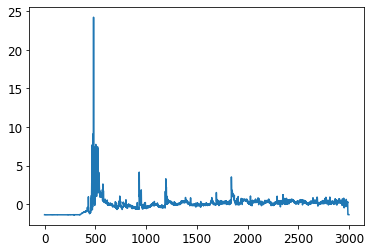

1220


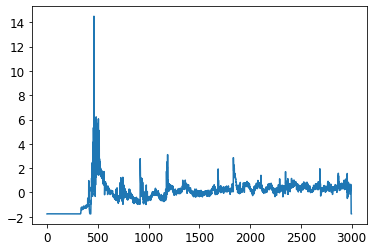

1221


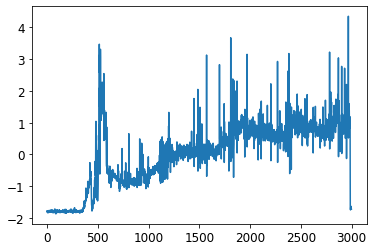

1222


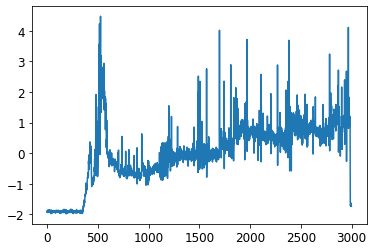

1227


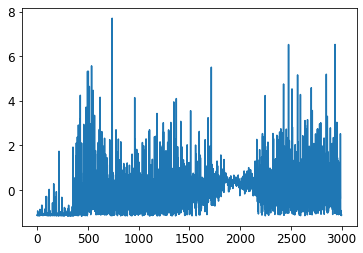

1235


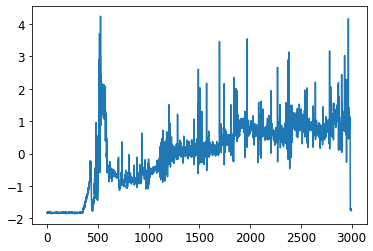

1236


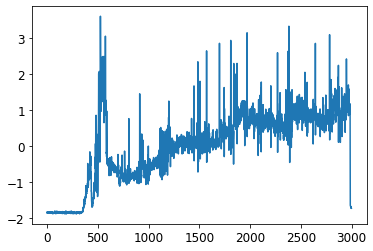

In [34]:
for index, i in enumerate(np.where(y==11)[0]):
    if index >40 and index <55:
        print(i)
        plt.figure()
        plt.plot(X_scaled[i])
        plt.show()

In [54]:
good_centers = kmeans_10.cluster_centers_

## Finding the best k with log

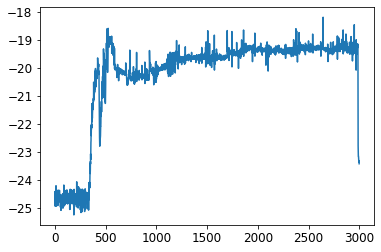

In [30]:
df_raw_log = np.log(df_raw)

plt.figure()
plt.plot(range(3000),df_raw_log.iloc[1000])
plt.show()

In [35]:
scaler = RowStandardScaler()
X_log_scaled = scaler.fit_transform(df_raw_log)

In [36]:
kmeans_log_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_log_scaled)
                for k in range(5, 35, 5)]
inertias_log = [model.inertia_ for model in kmeans_log_per_k]

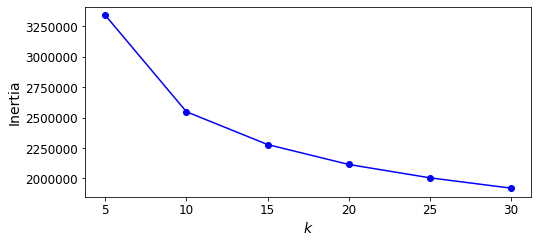

In [37]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(5, 35, 5), inertias_log, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [ ]:
-costruire dataset bilanciato con valori veri.
-data agumentation solo su traning, non su test
-reti rbf
-clustering